# Segmenting 3D image of a fossil

Here we look at Fossil Data from the documentary shown [here](https://vimeo.com/208535479) password is qbi2017 

An interactive video example [Video Instructions](http://people.ee.ethz.ch/~maderk/videos/DoesMyFossilHaveTeeth.swf)

The steps are to

- Load the data
- Display each slice in every direction
- Show a 3D isosurface plot

In [2]:
import numpy as np # linear algebra
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

Load the volume data from the file located in ```./Gut-PhilElvCropped.tif```. Also check the image size using the shape attribute of the numpy array (e.g. ```img.shape``` returns an array with as many elements as the number of dimensions).

In [3]:
# Your code to load the image here...


Display the middle slices in each direction of the volume and compute the histogram with 50 bins. It makes sense to use subplots here.

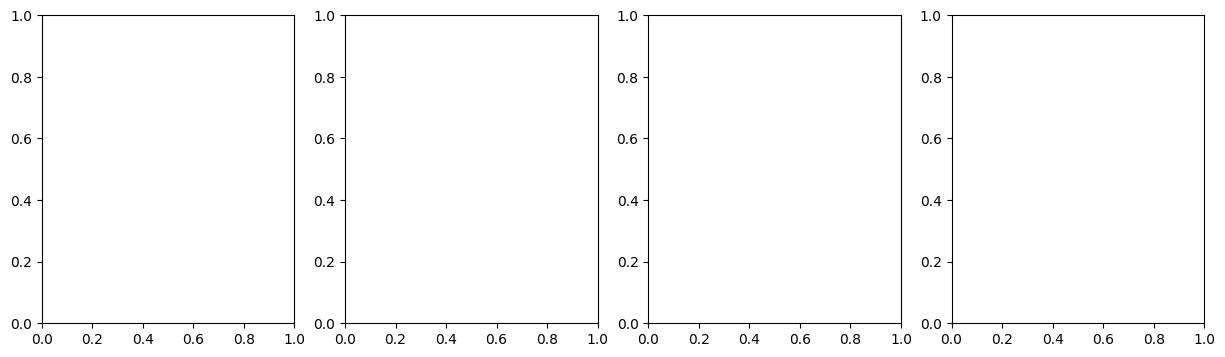

In [5]:
# Your code here
fig, ax = plt.subplots(1,4, figsize = (15, 4))

# Filtering
Here we use a simple filter to clean up the data, a better one would preserve features. Try for example a median or Gauss filter. Show the effect on a slice and plot the histograms before and after filtering.

In [7]:
# Your code here


# Showing Various Slices
Here we show the axial, saggital and coronal slices through the 3D Volume

(np.float64(-0.5), np.float64(2367.5), np.float64(1999.5), np.float64(-0.5))

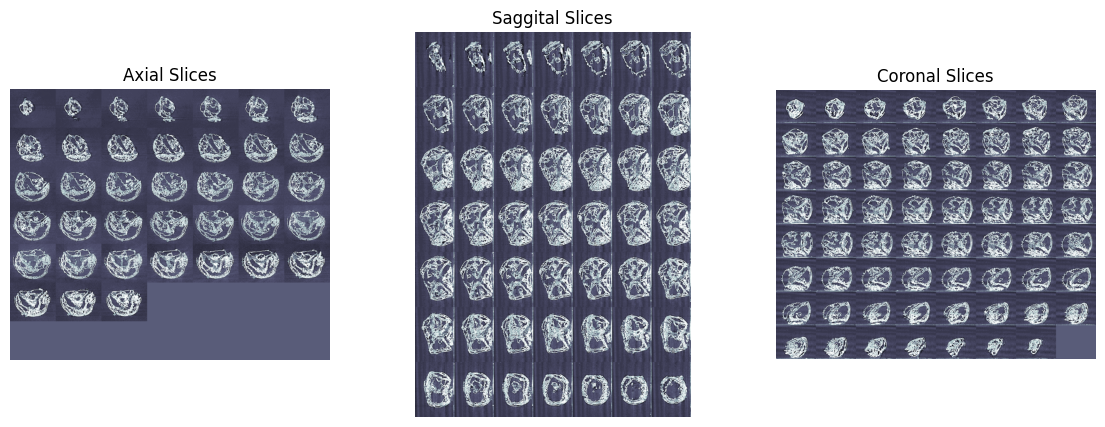

In [10]:
%matplotlib inline
skip_border = 50
skip_middle = 4

im_args = dict(cmap = 'bone', vmin = 55, vmax = 75)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 5))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Axial Slices')
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('Saggital Slices')
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('Coronal Slices')
ax3.axis('off')

# Apply Threshold
Here we apply a threshold to the data. Locate a threshold level in the histograms above. This is ideally found between the two histogram modes.

A threshold is set on a numpy array using the following syntax:

```python
thresholded_image = image < threshold
```

__Note:__ Matlplotlib has interpolation active as default setting. This make the edges blurred for the bilevel image. This can be fixed by adding the parameter _interpolation='none'_ to imshow e.g.
```python
plt.imshow(bilevel,interpolation='none')
```

In [11]:
# Your code here


# Morphology
Morphological operations can be used to remove misclassified voxels or to reduce the level of detail in the image. 
In this example, we want to create an image that only shows the main voids as a mask of the sample.

This can be achieve using a morphological closing operation (dilation followed by an erosion).

$$\phi(img)=\epsilon(\delta(img))$$

The closing operation is implemented in scikit image as ```binary_closing```. We also need a structure element, in this case a ball with radius 5. You can also play with the ball size to see the effect.

In [13]:
from skimage.morphology import binary_closing, ball

# Your code here

Until now, we only looked a slice planes in the volume. Next step is visualize the 3D shape of the sample. This can be done using an _isosurface_, i.e. a surface represented by a single gray level in the image. The following cells show how you can do this.

In [15]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces, _, _ = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.9, edgecolor='none', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([1, 0, 0])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

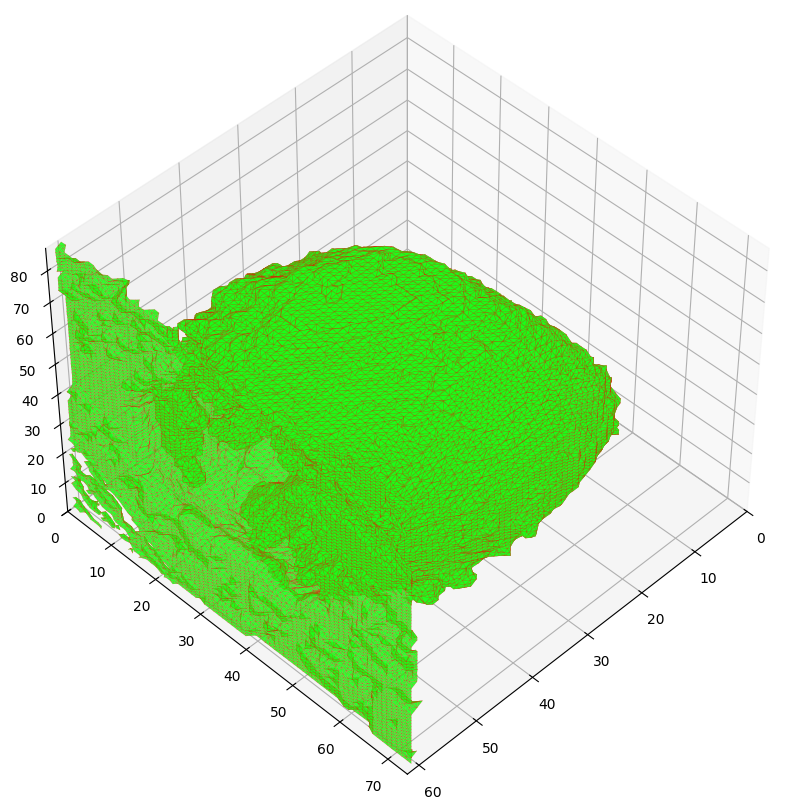

In [16]:
from scipy.ndimage import zoom
# we downsample the image to make 3d rendering quicker
fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
# now we display it with a nice mesh
_ = show_3d_mesh(fossil_downscale, 0.5)